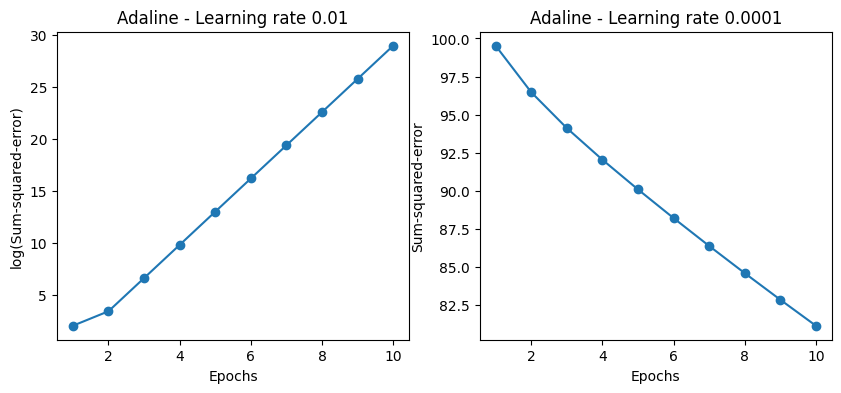

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

#ADAptive LInear NEuron-Gradient Descent:
class AdalineGD (object):
  def __init__(self, learningRate, visitCounts, randomSeed):
    self.learningRate = learningRate
    self.visitCounts = visitCounts
    self.randomSeed = randomSeed

  def training(self, inputMatrix, classLabels):
    np.random.seed(self.randomSeed)

    self.weights_ = []

    for i in range(len(inputMatrix[0])+1):
      self.weights_.append(np.random.rand()*0.01)

    self.weights_ = np.array(self.weights_)

    self.costs_ = []

    for _ in range(self.visitCounts):
      zs = self.net_input(inputMatrix)
      outputs = self.activation(zs)
      errors = classLabels - outputs
      self.weights_[1:] += (self.learningRate * inputMatrix.T.dot(errors))
      self.weights_[0] += self.learningRate * errors.sum()

      cost = (errors ** 2).sum()
      self.costs_.append(cost)

    return self

  def net_input(self, inputMatrix):
    return np.dot(inputMatrix, self.weights_[1:]) + self.weights_[0]

  def activation(self, inputMatrix):
    return inputMatrix #For now, just a placeholder. But it can twist things completely.



s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris','iris.data')

df = pd.read_csv(s, header=None, encoding='utf-8')

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(0.01, 10, 1).training(X, y)

ax[0].plot(range(1, len(ada1.costs_) + 1), np.log10(ada1.costs_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(0.0001, 10, 1).training(X, y)
ax[1].plot(range(1, len(ada2.costs_) + 1), ada2.costs_, marker='o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

